Table 'SentimentAnalyse' created
negative reviews: 14 (saved in db)
neutral reviews: 27 (saved in db)
positive reviews: 188 (saved in db)


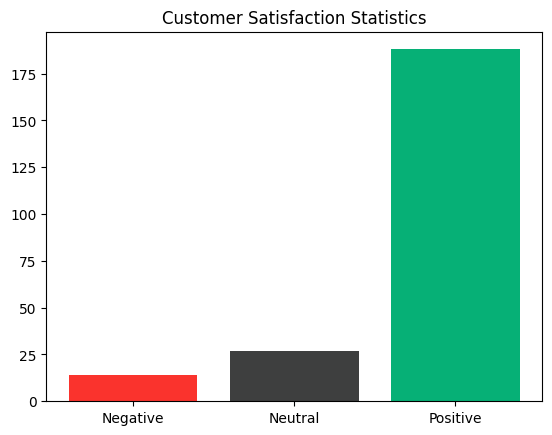

In [1]:
import csv
import re
import json
import matplotlib.pyplot as plt
from database import (drop_table,conn,cursor,create_table)

table_name = "SentimentAnalyse"
drop_table(table_name)
create_table(table_name, "type","total")


def insert_data(type, total ):
    cursor.execute(f"INSERT INTO {table_name} (type, total) VALUES (?, ?)", type, total)
    print(f"{type} reviews: {total} (saved in db)")
    conn.commit()
    
# Load word list from json file
def get_word_list(category):
    with open("data/"+category + '.json', 'r') as f:
        word_list = json.load(f)
    return word_list

# Determine sentiment of a review
def get_sentiment(review):
    review = re.sub('[^\w\s]', '', review).lower()
    positive_words = get_word_list('positive_words')
    negative_words = get_word_list('negative_words')
    words = review.split()
    positive_count = 0
    negative_count = 0
    for word in words:
        if word[:-1] in [w.lower() for w in positive_words] or word in [w.lower() for w in positive_words]:
            positive_count += 1 
        elif word in [w.lower() for w in negative_words] or word[:-1] in [w.lower() for w in negative_words]:
            negative_count += 1
    if positive_count > negative_count:
        return 'positive'
    elif negative_count > positive_count:
        return 'negative'
    else:
        return 'neutral'

# Initialize sentiment counter
reviews_sentiment = {"positive": 0, "negative": 0, "neutral": 0 }

# Read reviews from CSV file and update sentiment counter
with open('data/reviews.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        if row['title']:    
            sentiment = get_sentiment(row['title'])
            reviews_sentiment[sentiment] += 1

# Print sentiment counts
for sentiment in ['negative', 'neutral', 'positive']:
    insert_data(sentiment, reviews_sentiment[sentiment])

# Plot sentiment bar chart
left = [1, 2, 3]
tick_label = ['Negative', 'Neutral', 'Positive']
plt.bar(left, height=(reviews_sentiment['negative'],reviews_sentiment['neutral'],reviews_sentiment['positive']), 
        tick_label=tick_label, width=0.8, color=( "#FA332D","#3E3F3F","#06B076"))
plt.title('Customer Satisfaction Statistics')
plt.show()